# BMEN 509 - Laboratory 1 - Image Domain
The purpose of this laboratory is to become familiar with digital images and how to work with images.
In this exercise, you will demonstrate 1) a basic understanding of digital image representation, 2)
an ability to perform simple operations on images, and 3) an understanding of fundamental image
processing techniques.

Your rubric is as follows:
<img src="https://github.com/Lucas-Ion/BMEN509-UCID30088132/blob/main/BMEN-509-Lab-1/Report/NotebookImages/Brain.png" alt="Rubric" width="600"/>

Please use this notebook to complete your assignment. Sections to be completed are blank and are marked by `TODO`. Please upload the notebook (.ipynn) and as a PDF (.pdf) by using File > Download as > PDF via LaTeX.

## Lucas Ion, January 27th 2023

### Objective
## The overall goal of this lab is to explore various aspects of image processing ranging from loading images, to manipulating images, to analyzing filters. We will become familiarized with loading images and adding key information to images, we will then become familar with window level functions and how they work and impact an image, we will then work with Gaussian functions and understand how sigma and kernel sizes impact an image, and lastly we will conclude by examining how to understand Signal, Noise, and Contrast by implementing an SNR function and a CNR function and interpreting the results.

## Notebook Setup

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
from math import sqrt, pi, exp

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [2]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [3]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


## Question 1 - Image Basics
Using the image BreastUltrasound5.tif do the following:
1. Load the image
2. Display the image
3. Give the image a title, x-axis label, y-axis label, and add a colorbar
4. What is the size of the image in the X and Y dimensions?
5. How many pixels are in the image?
6. Which corner of the image is the pixel (0,0)?
7. Plot the histogram of the image with 256 bins

Reading image ./Data/BreastUltrasound5.tif
Image ./Data/BreastUltrasound5.tif has:
  89768 pixels
  size (229, 392)
  data type uint8
  dimensionality 2
The top left corner of the image corresponds to 0,0


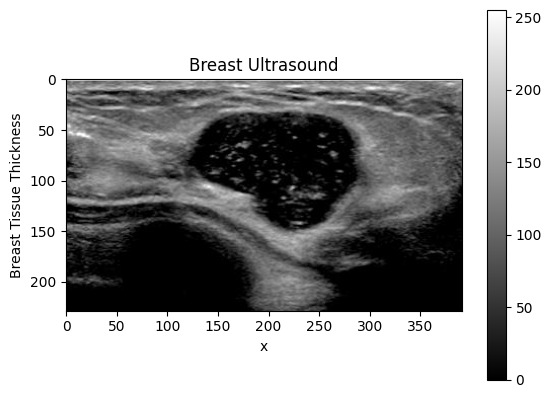

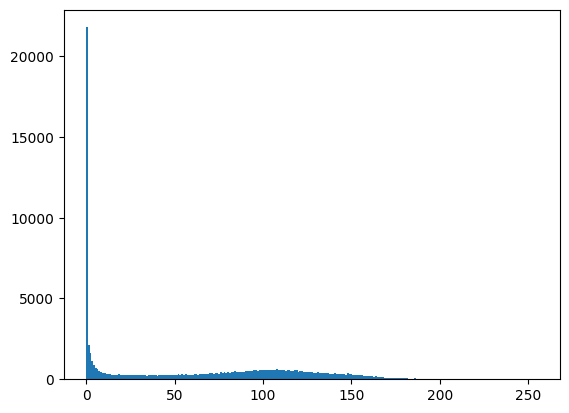

In [4]:
# Finally, we can load in images from disk. Let's load the image 'mri_T2.tif'
filename = os.path.join(data_directory, 'BreastUltrasound5.tif')

print('Reading image {}'.format(filename))
I = io.imread(filename)

# Let's the properties!
print('Image {} has:'.format(filename))
print('  {} pixels'.format(np.prod(I.shape)))
print('  size {}'.format(I.shape))
print('  data type {}'.format(np.dtype(I[0,0])))
print('  dimensionality {}'.format(len(I.shape)))
print('The top left corner of the image corresponds to 0,0')

# Let's see the image!
plt.imshow(I, cmap='gray')
plt.title('Breast Ultrasound')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('Breast Tissue Thickness')


plt.show()

plt.show()

ax = plt.hist(I.ravel(), bins=256)


## Question 2 - Transfer Functions
Window and Level is a common technique for visualizing biomedical images. You can visualize
specific tissues by expanding the contrast in a narrow range of gray values while ignore all other
gray values. Window and Level is easy to implement as a simple transfer function, given below.

<img src="NotebookImages/TransferFunction.jpg" alt="Transfer Function" width="400"/>

The linear transform is given by:

$$ J(x,y) = m * I(x,y) + b $$

Determine how to calculate m and b. If you get stuck, refer to the laboratory notes. Write a function
`window_level_function` that takes as input an image, a window, and a level and returns as output an image that has been
windowed and levelled. The output image should be an 8-bit unsigned integer.
The input image will need to be converted to a double and you will have to convert the output
image to an unsigned 8-bit integer. Remember that the maximum value for an 8-bit unsigned integer
is 255.

The code below loads the image `mri_T2.tif`. Using your function, it displays the image and its histogram at the
following windows and levels. The corresponding tissue for each window and level is given on the
right.

| Tissue | Window | Level |
|:------ |:------:|:-----:|
|Whole dynamic range|255|128|
|High contrast between white and gray matter|50|50|
|Background|10|20|
|Tumour|50|100|

After writing your function and running the given code, answer the following questions:

    1) Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
    2) In your own words, why does windowing and levelling allow us to see different tissues?

In [5]:

def window_level_function(image, window, level):
    # TODO: Implement this function

    image = image.astype(np.float64)
    min = level - (0.5 * window)
    max = level + (0.5 * window)
   
    #Setting the m and b values
    m = 255/window
    b = 255 - (255/window)*(level+(0.5* window))
    image = image * m+ b
    image[np.less(image, min)] = 0
    image[np.greater(image, max)] = 255
    return image.astype(np.uint8)

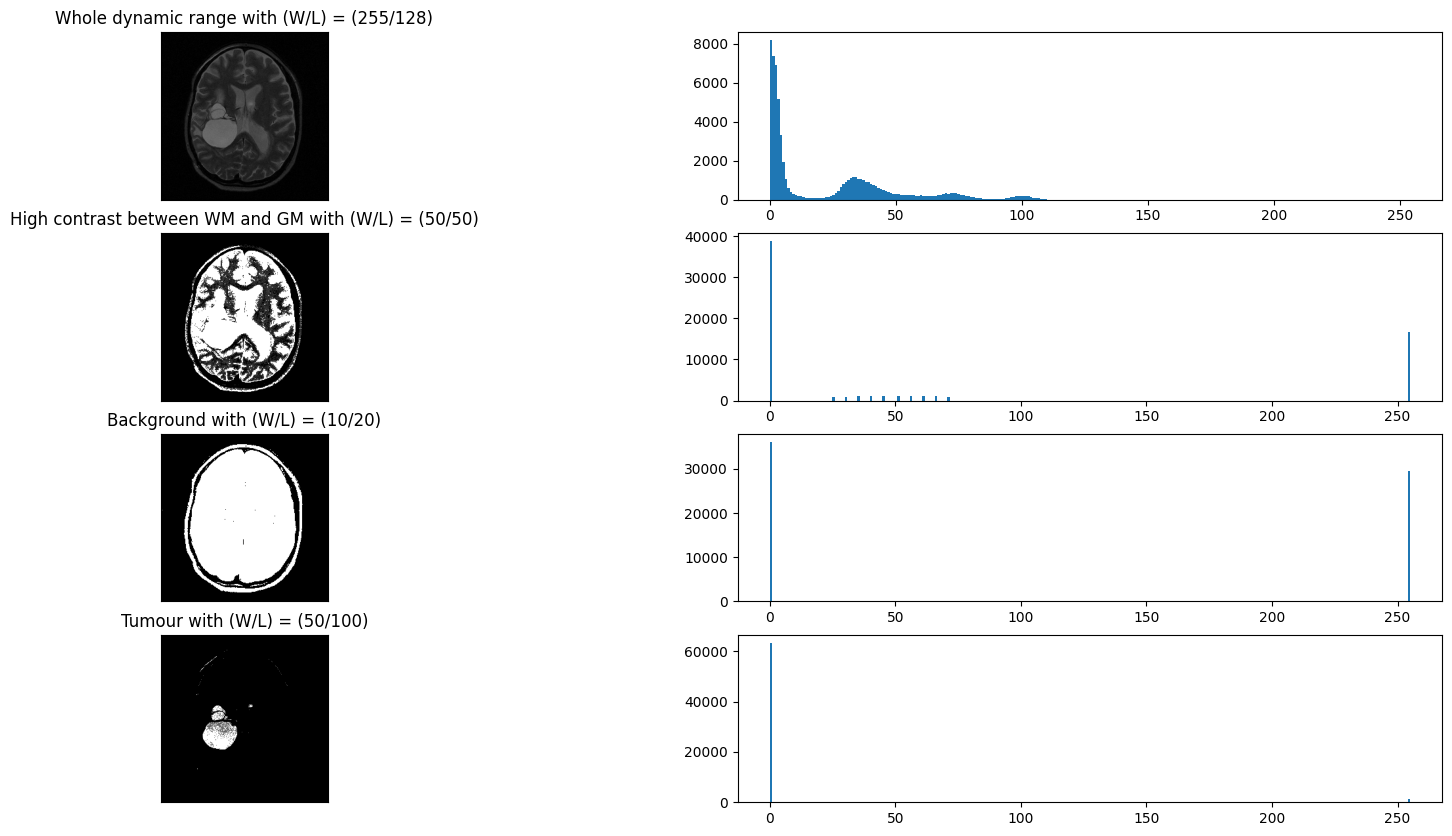

Question 1: Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
TODO: Answer




Question 2: In your own words, why does windowing and levelling allow us to see different tissues?
TODO: Answer









In [6]:
image = io.imread(os.path.join(data_directory, 'mri_T2.tif'))

pairs = {
    'Whole dynamic range':             (255, 128),
    'High contrast between WM and GM': (50, 50),
    'Background':                      (10, 20),
    'Tumour':                          (50, 100)
}

i = 1
plt.subplots(len(pairs), 2, figsize=(20,10))
for key in pairs:
    window, level = pairs[key]

    new_image = window_level_function(image, window, level)
    
    plt.subplot(len(pairs), 2, 2*i-1)
    plt.imshow(new_image, cmap='gray')
    plt.title('{} with (W/L) = ({}/{})'.format(key, window, level))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(len(pairs), 2, 2*i)
    plt.hist(new_image.ravel(), bins=256)
    
    i += 1
plt.show()

print('''Question 1: Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
TODO: Answer



''')

print('''Question 2: In your own words, why does windowing and levelling allow us to see different tissues?
TODO: Answer






''')

### Question 1:

#### As can be seen in the code when inputting a respective window level value of 50/50, the bottom limit becomes 25, with all values below that becoming 0, and the upper limit becomes 75 with all other values becoming 255. This is subsequently demonstrated in the graph as well.

### Question 2:

#### Windowing and leveling are key techniques that allow medical imaging professionals to view different tissues types by changing the brightness and contrast of an image. Windowing and leveling involves setting a range of brightness values. The goal is that the brightness range that is created will then emphasize certain features, while the overall brightness can then bring to focus the features we wanted to emphasize.



## Question 3 - Exploring a Gaussian Function
The Gaussian filter is one of the most powerful filters in image processing. Here, we are going to
explore the effects of changing the kernel size and the response size of a Gaussian filter to better
understand the parameters.

The code below loads the image `knee_ct2.tif` and displays the image. Next, it filters the image with a sigma of 2
and at five different kernel sizes: 3, 5, 7, 21 and 51. Next, it filters the image with a kernel size of 21
and at five different sigmas: 0.5, 1, 2, 3, 5. Plot the filtered image for all 11 responses.

Your objective is to write the function `gaussian_kernel`. This function creates a Gaussian kernel using the equation:

$$ J(x,y) = \frac{1}{\sqrt{2 \pi} \sigma} exp\left( - \frac{(x-\mu_x)^2 + (x-\mu_y)^2}{2 \sigma^2} \right) $$

where $\sigma$ determines the frequency response of the fitler and $(\mu_x, \mu_y)$ are the centers of the kernel. Note that the kernel size is also a parameter!

If you need help conceptualizing image convolution, I would recommend [Image Kernels Explained Visually](http://setosa.io/ev/image-kernels/).

In your own words, answer the following questions:
1. What is the effect of increasing the kernel size but keeping sigma constant?
2. What is the effect of increasing the sigma but keeping the kernel size constant?
3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?
4. What is the disadvantage of making the kernel extremely large?

In [7]:
def gaussian_kernel(sigma, kernel_size): 
    # TODO: Implement this function
    mu_x = int(kernel_size/2)
    mu_y = mu_x
    kernel = np.ones((kernel_size,kernel_size))
    for x in range(kernel_size):
        for y in range(kernel_size):
            kernel[x,y] = 1/(sqrt(2*pi)*sigma)*exp(-((x-mu_x)**2 + (y-mu_y)**2)/(2*sigma**2))
    
    return kernel

In [8]:
# Load image
image = io.imread(os.path.join(data_directory, 'knee_ct2.tif'))

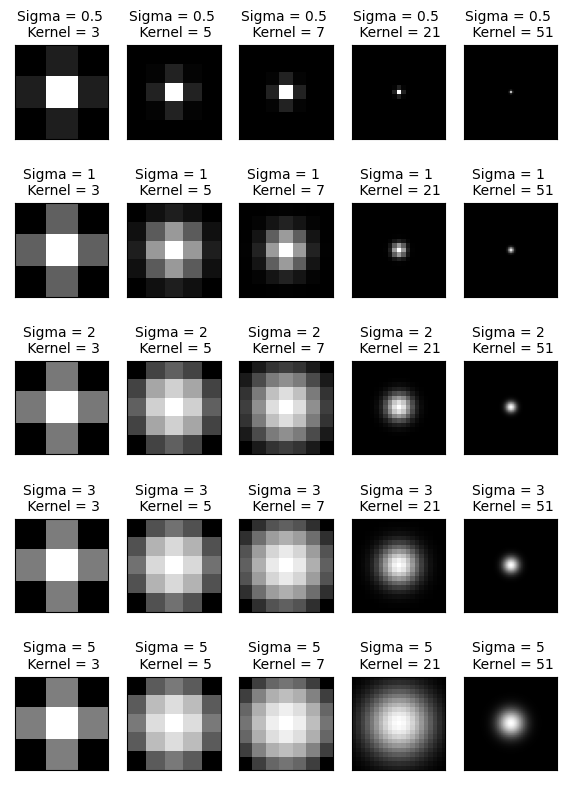

In [9]:
# Create kernels
sigmas = [0.5, 1, 2, 3, 5]
kernels = [3, 5, 7, 21, 51]

plt.subplots(len(sigmas), len(kernels), figsize=(7, 7))
for i, sigma in enumerate(sigmas):
    for j, kernel in enumerate(kernels):
            gauss = gaussian_kernel(sigma, kernel)

            plt.subplot(len(sigmas), len(kernels), j + i * len(sigmas) + 1)
            plt.imshow(gauss, cmap='gray')
            plt.title('Sigma = {} \n Kernel = {}'.format(sigma, kernel), fontsize=10)
            plt.xticks([])
            plt.yticks([])
plt.subplots_adjust(top = 1.2)
plt.show()

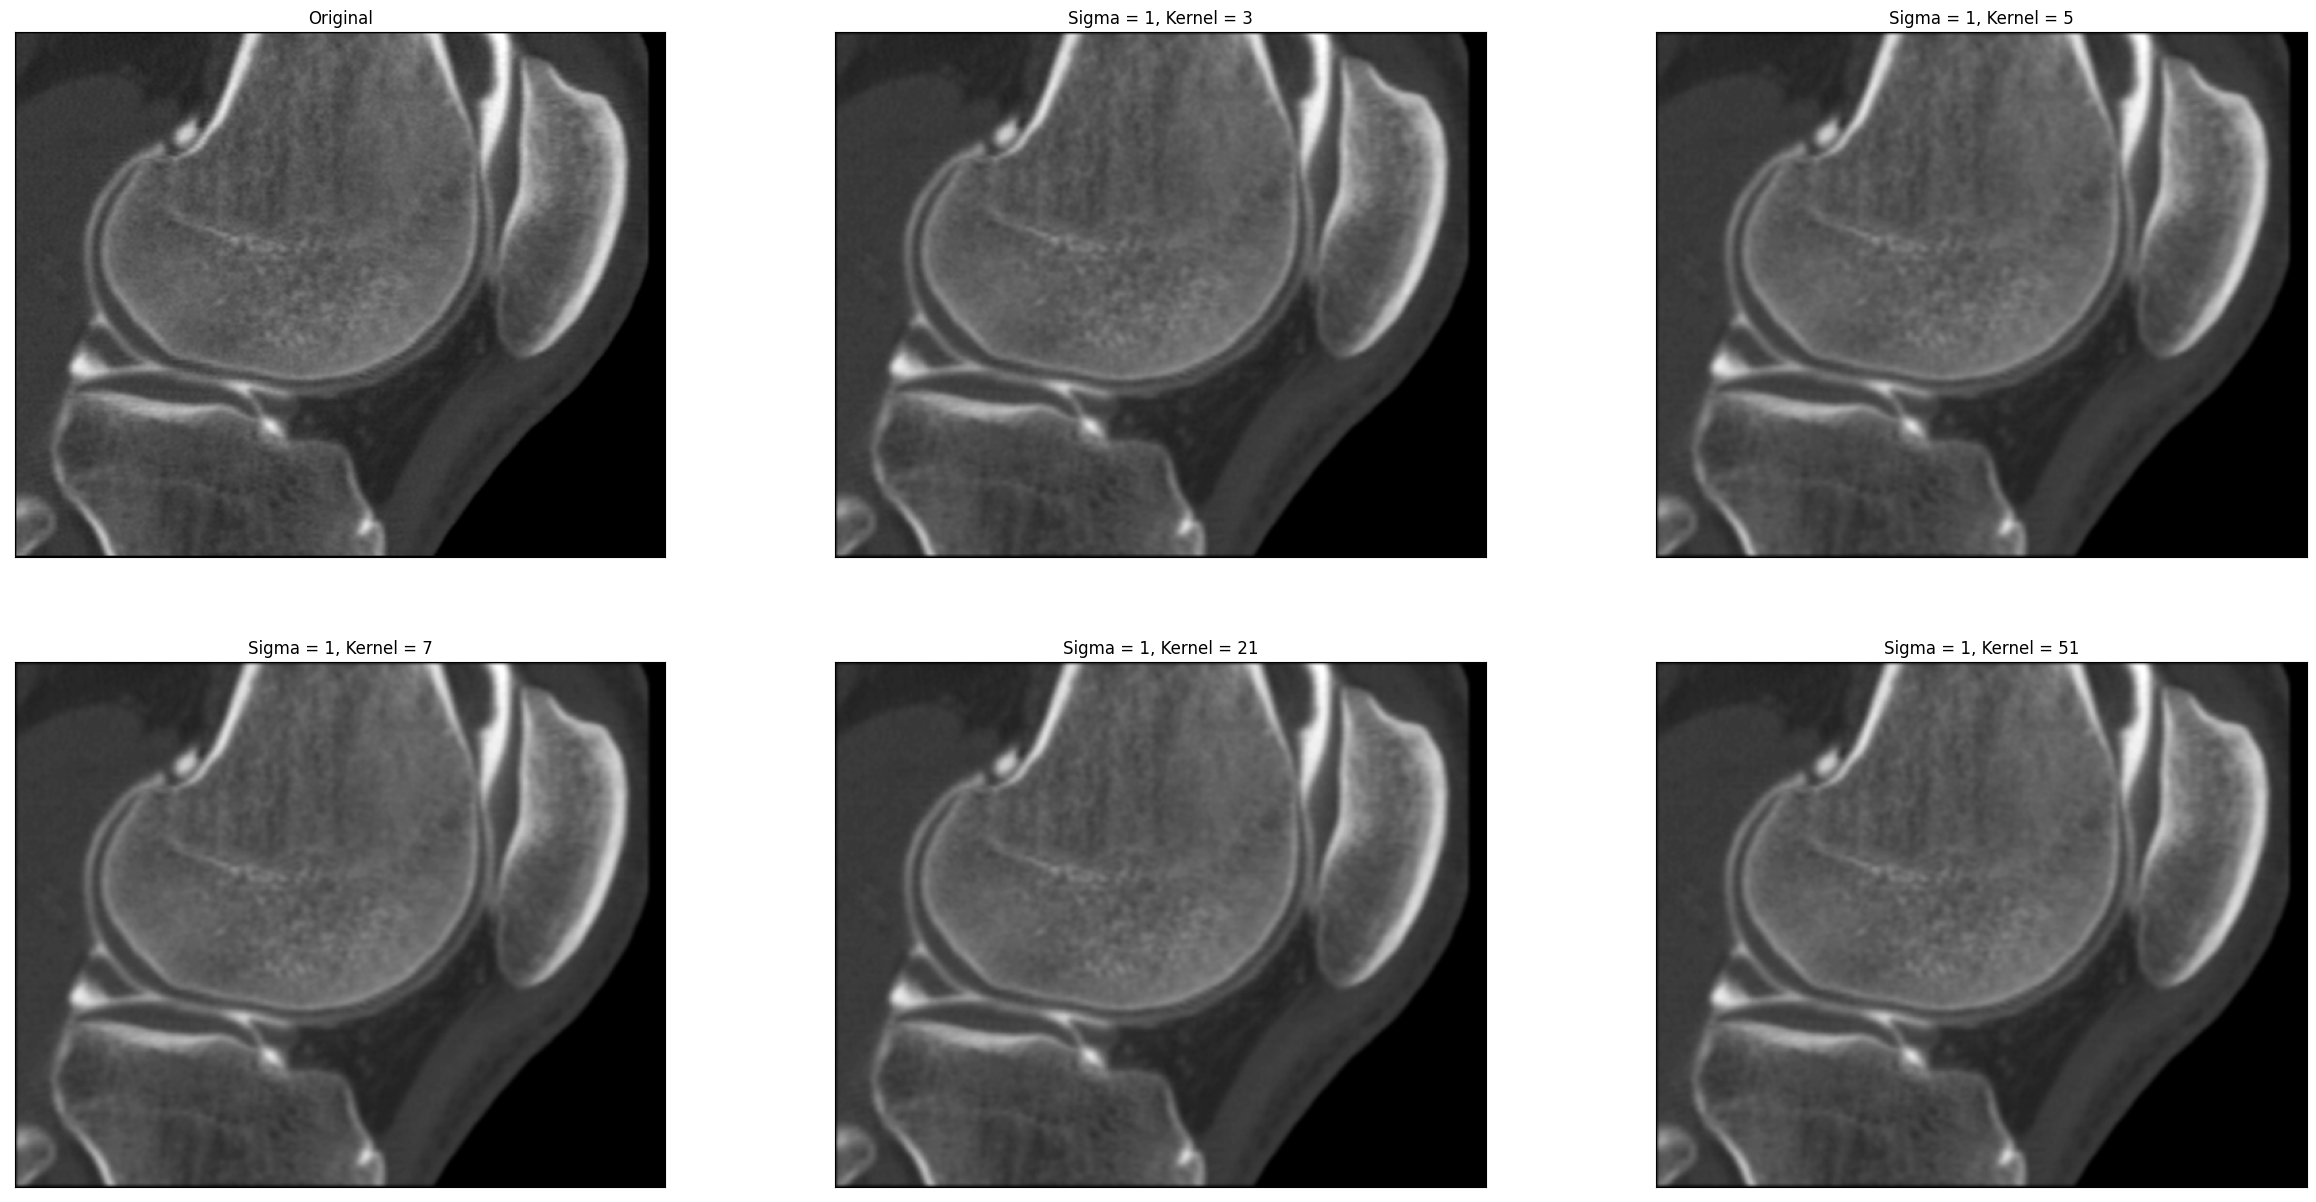

In [10]:
sigma = []
kernel = []

# Kernel sizes
sigma = 1
kernels = [3, 5, 7, 21, 51]

plt.subplots(2, (len(kernels)+1)//2, figsize=(30, 15))
plt.subplot(2, (len(kernels)+1)//2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
i = 2
for kernel in kernels:
    gauss = gaussian_kernel(sigma, kernel)
    smooth_image = signal.convolve2d(image, gauss, boundary='pad', mode='same')

    plt.subplot(2, (len(kernels)+1)//2, i)
    plt.imshow(smooth_image, cmap='gray')
    plt.title('Sigma = {}, Kernel = {}'.format(sigma, kernel))
    plt.xticks([])
    plt.yticks([])

    i += 1
plt.show()

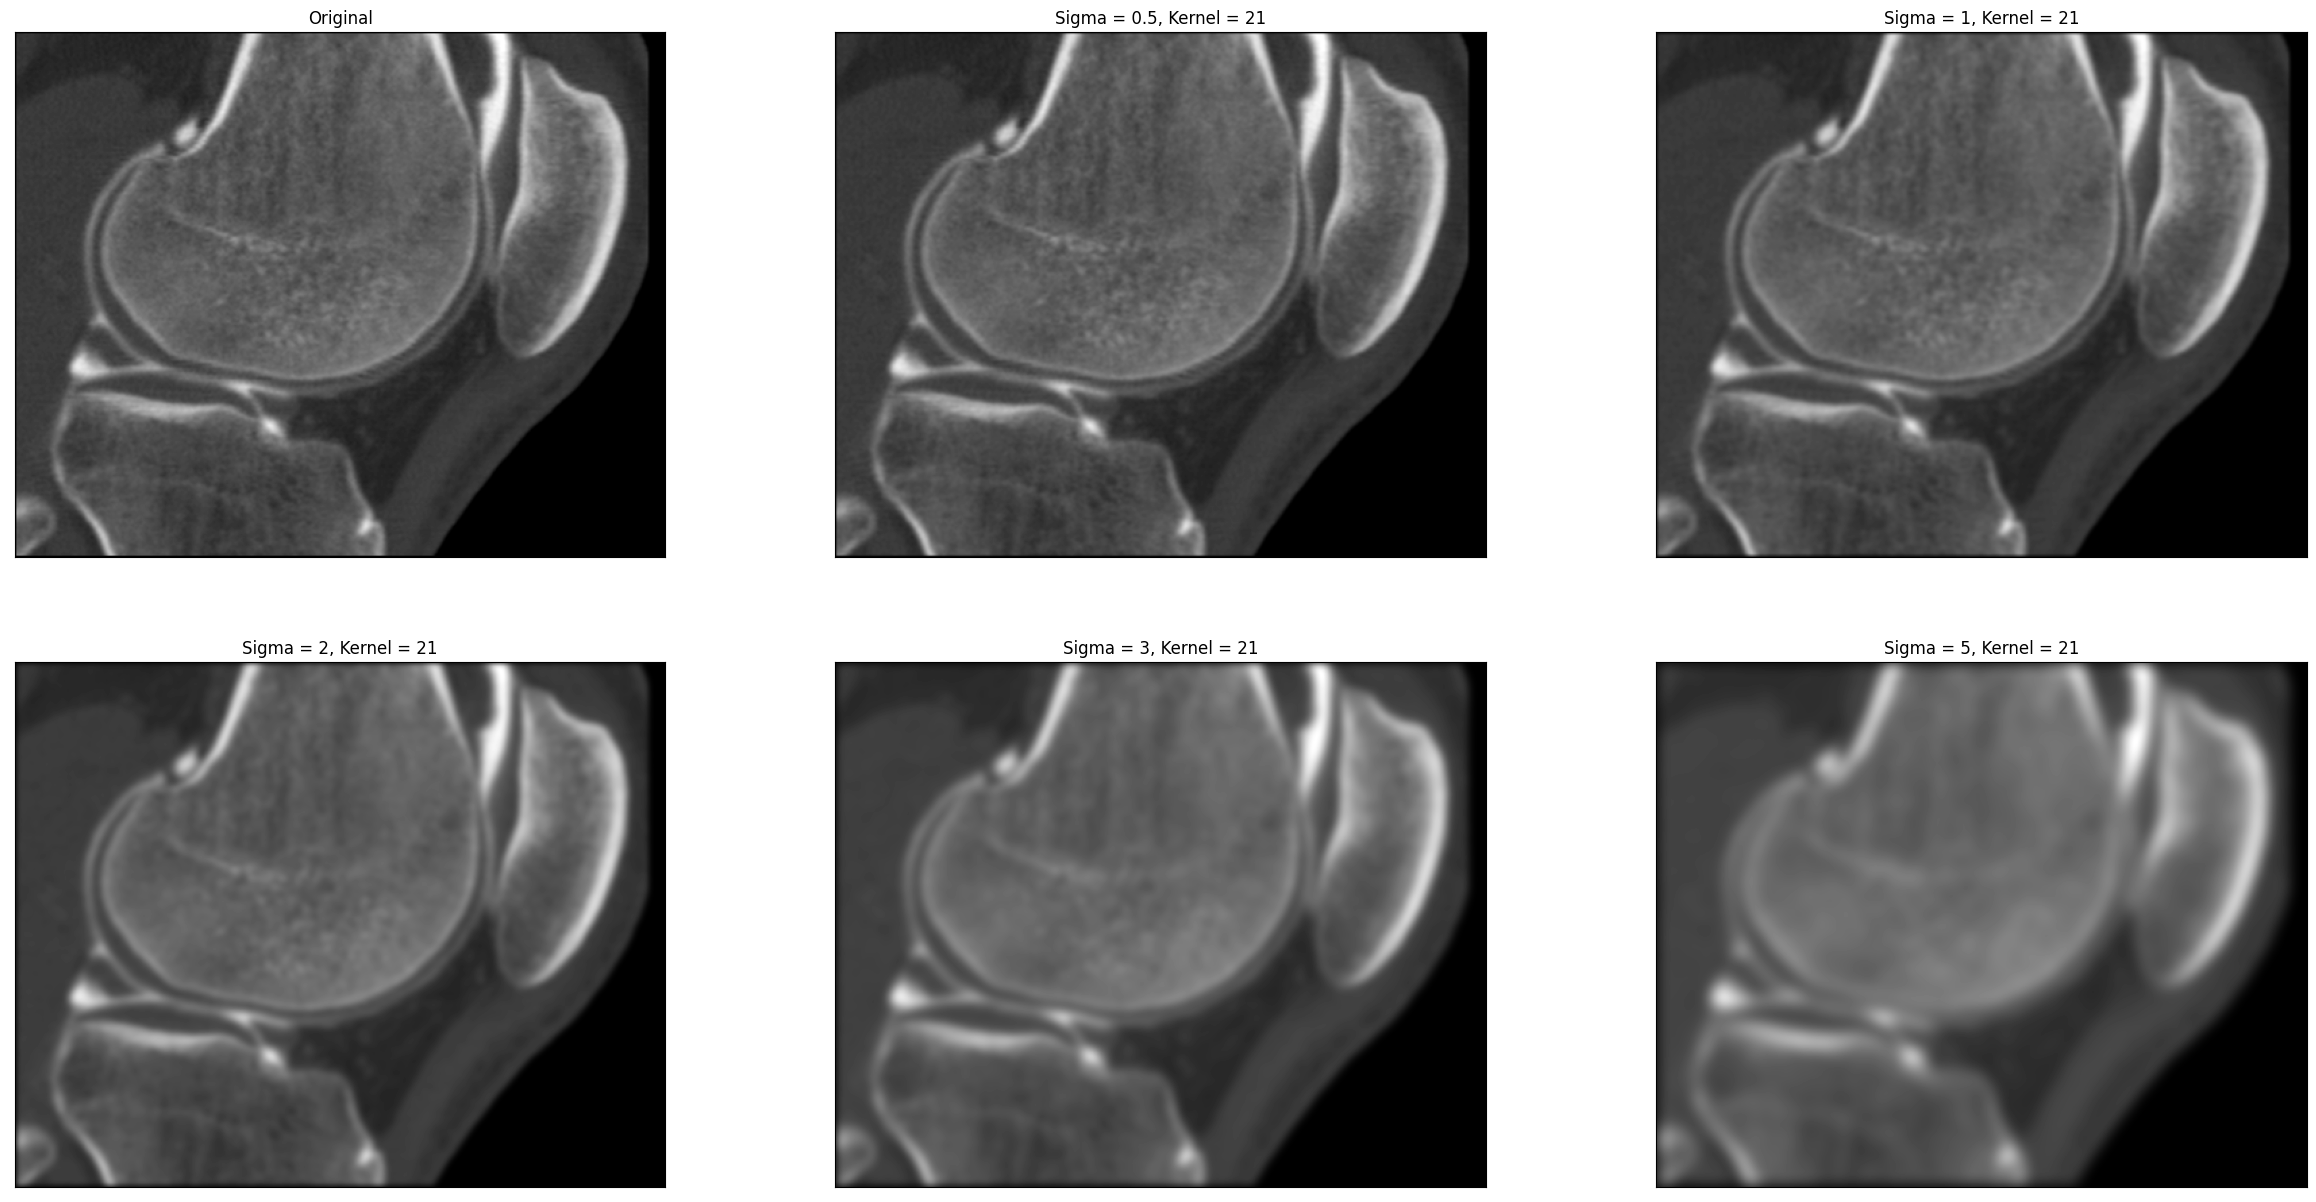

In [11]:
sigma = []
kernel = []

# Sigmas
sigmas = [0.5, 1, 2, 3, 5]
kernel = 21

plt.subplots(2, (len(kernels)+1)//2, figsize=(30, 15))
plt.subplot(2, (len(kernels)+1)//2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
i = 2
for sigma in sigmas:
    gauss = gaussian_kernel(sigma, kernel)
    smooth = signal.convolve2d(image, gauss, boundary='pad', mode='same')
    
    plt.subplot(2, (len(kernels)+1)//2, i)
    plt.imshow(smooth, cmap='gray')
    plt.title('Sigma = {}, Kernel = {}'.format(sigma, kernel))
    plt.xticks([])
    plt.yticks([])

    i += 1
    
plt.show()

In [12]:
print('''Question 1. What is the effect of increasing the kernel size but keeping sigma constant?
TODO: Answer


''')

print('''Question 2. What is the effect of increasing the sigma but keeping the kernel size constant?
TODO: Answer
''')

print('''Question 3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?
TODO: Answer
''')

print('''Question 4. What is the disadvantage of making the kernel extremely large?
TODO: Answer
''')


Question 1. What is the effect of increasing the kernel size but keeping sigma constant?
TODO: Answer



Question 2. What is the effect of increasing the sigma but keeping the kernel size constant?
TODO: Answer

Question 3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?
TODO: Answer

Question 4. What is the disadvantage of making the kernel extremely large?
TODO: Answer



### Question 1

#### Increasing the kernel size does not have a strong effect on the image when sigma is kept constant. However there is slight blurring that occurs due to more 0’s being padded on the outside as the kernel size becomes larger. Therefore the effect of increasing the kernel size but keeping sigma constant is a smoother and slightly more blurred output.

### Question 2

#### Increasing the sigma value but keeping the kernel size constant results in a smoother, less detailed output. Because sigma corresponds to the standard deviation in a Gaussian distribution when creating a kernel, it corresponds to how weights are spread in a kernel. Therefore as you increase the size of sigma, this means that the kernel averages the values of more pixels from the input image. When the kernel is kept a constant size, this means the weights are spread over a larger “area”, thus creating a more smooth output lacking detail.

### Question 3

#### Each image carries unique characteristics and thus there is no “end-all be-all solution,” however there are a few key things we can pay attention to when selecting the sigma and kernel size for Gaussian Filtering. Typically when there is a higher amount of noise in an image we would select a larger sigma value, and the opposite is true for an image with lower amounts of noise. When choosing a kernel size we can also decide based on the noise whether we want a smoother image or one with more detail. Choosing a larger kernel will yield more smoothing, but will result in a greater loss of detail compared to a smaller kernel which will yield more detail but greater noise.

### Question 4

#### By making the kernel extremely large this would firstly result in an image that is overly smooth with a high loss of detail. An extremely large kernel would result in an image with a significant loss of detail and would seem smoothed over and blurry. The other disadvantage of a very large kernel is that it is very computationally intensive, since the filter needs to convolute the kernel over an entire image. This can result in a very large computation time.


## Question 4 - Understanding Signal, Noise, and Contrast
Qualitative description and quantitative metrics are complementary tools for assessing image processing algorithms. Metrics are free from observer variability, but can fail to capture nuance. In
this section, we are going to repeat the Gaussian and use the median filtering (see Lab01Ex05) but
include metrics for signal-to-noise ratio (SNR) and contrast-to-noise ratio (CNR).
Using the image `mri_pd.tif`, the code below does the following:
1. Loads the image and add salt and pepper noise (with noise density 0.1) and Gaussian noise (with mean 0, variance 0.01)
2. Filters the resulting noisy images with a median filter and a Gaussian filter with sigma 3
3. Selects two points on the image to compare contrast.
4. Computes the SNR for the image, the CNR for the two points, and plots the points and the images together.
5. Produces an image similar to the following, where the red and green points are the indices passed to the function.

<img src="NotebookImages/Brain.png" alt="Brain" width="400"/>

6. Plots the original image, the image with salt and pepper noise, and the image with Gaussian noise
7. Plots the salt and pepper noise image after median filtering and after Gaussian filtering
8. Plots the Gaussian noise image after median filtering and after Gaussian filtering

Your task is to write the functions `SNR` and `CNR` functions. Additionally, answer the following questions:
1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?

In [13]:
def SNR(image):
    # TODO: Implement
    #Converting the image to a numpy array
    image_array = np.array(image)
    image_mean = np.mean(image_array)
    image_std = np.std(image_array)
    snr = (image_mean/image_std)
    
    return snr

def CNR(image, first_point, second_point):
    # TODO: Implement

    # Convert the image to a numpy array
    image_array = np.array(image)
    point1 = image_array[first_point[0], first_point[1]]
    point2 = image_array[second_point[0], second_point[1]]
    point_one_mean = np.mean(point1)
    point_two_mean = np.mean(point2)
    
    # Compute the difference in signal intensity
    signal_diff = abs(point_one_mean - point_two_mean)
    # Compute the standard deviation of the image
    image_std = np.std(image_array)
    # Compute the CNR
    cnr = signal_diff / image_std    


    return cnr

In [14]:
def add_gaussian_noise(image, mean, var):
    # Express the variance as a percentage of the data type
    std = np.sqrt(var)*(np.iinfo(image.dtype).max - np.iinfo(image.dtype).min)
    noise = std * np.random.randn(*image.shape) + mean
    return image + noise

def add_salt_and_pepper_noise(image, density):
    # Draw random var. With probability p, ceil at bottom. With probability p, floor at top
    probability = density / 2.0
    
    rand_image = np.random.rand(*image.shape)
    output = image.copy()
    output[ rand_image < probability ] = np.iinfo(image.dtype).min
    output[ np.logical_and(rand_image >= probability, rand_image < density) ] = np.iinfo(image.dtype).max
    
    return output

In [15]:
def plot_image_with_point(image, first_point, second_point, show=True):
    plt.imshow(image, cmap='gray')
    plt.scatter(first_point[0], first_point[1], c='g', s=20*4**2)
    plt.scatter(second_point[0], second_point[1], c='y', s=20*4**2)
    plt.title('SNR = {0:0.2f}, CNR = {1:0.2f}'.format(
        SNR(image),
        CNR(image, first_point, second_point)
    ))
    plt.xticks([])
    plt.yticks([])
    
    if show:
        plt.show()

Image and noise


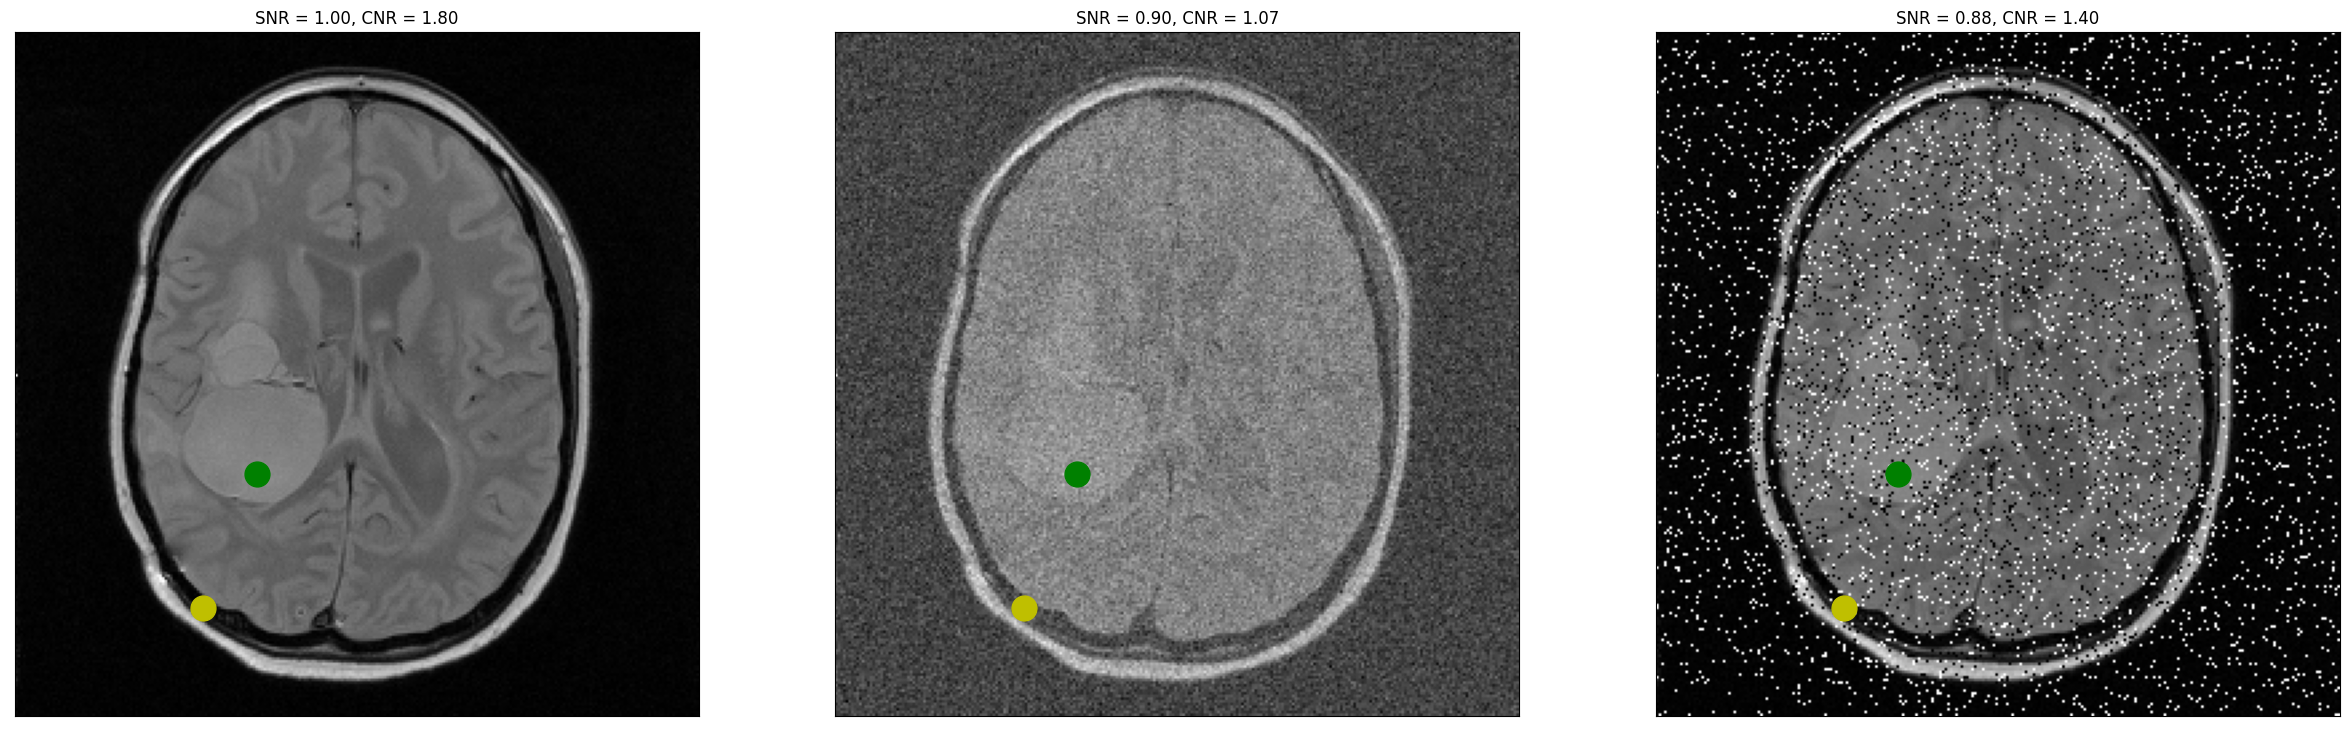

Salt & Pepper Noise


/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_29392/863246641.py:22: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plot_image_with_point(ndimage.filters.gaussian_filter(med_noise, 1), brain_point, csf_point, False)
/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_29392/863246641.py:24: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plot_image_with_point(ndimage.filters.median_filter(med_noise, 3), brain_point, csf_point, False)


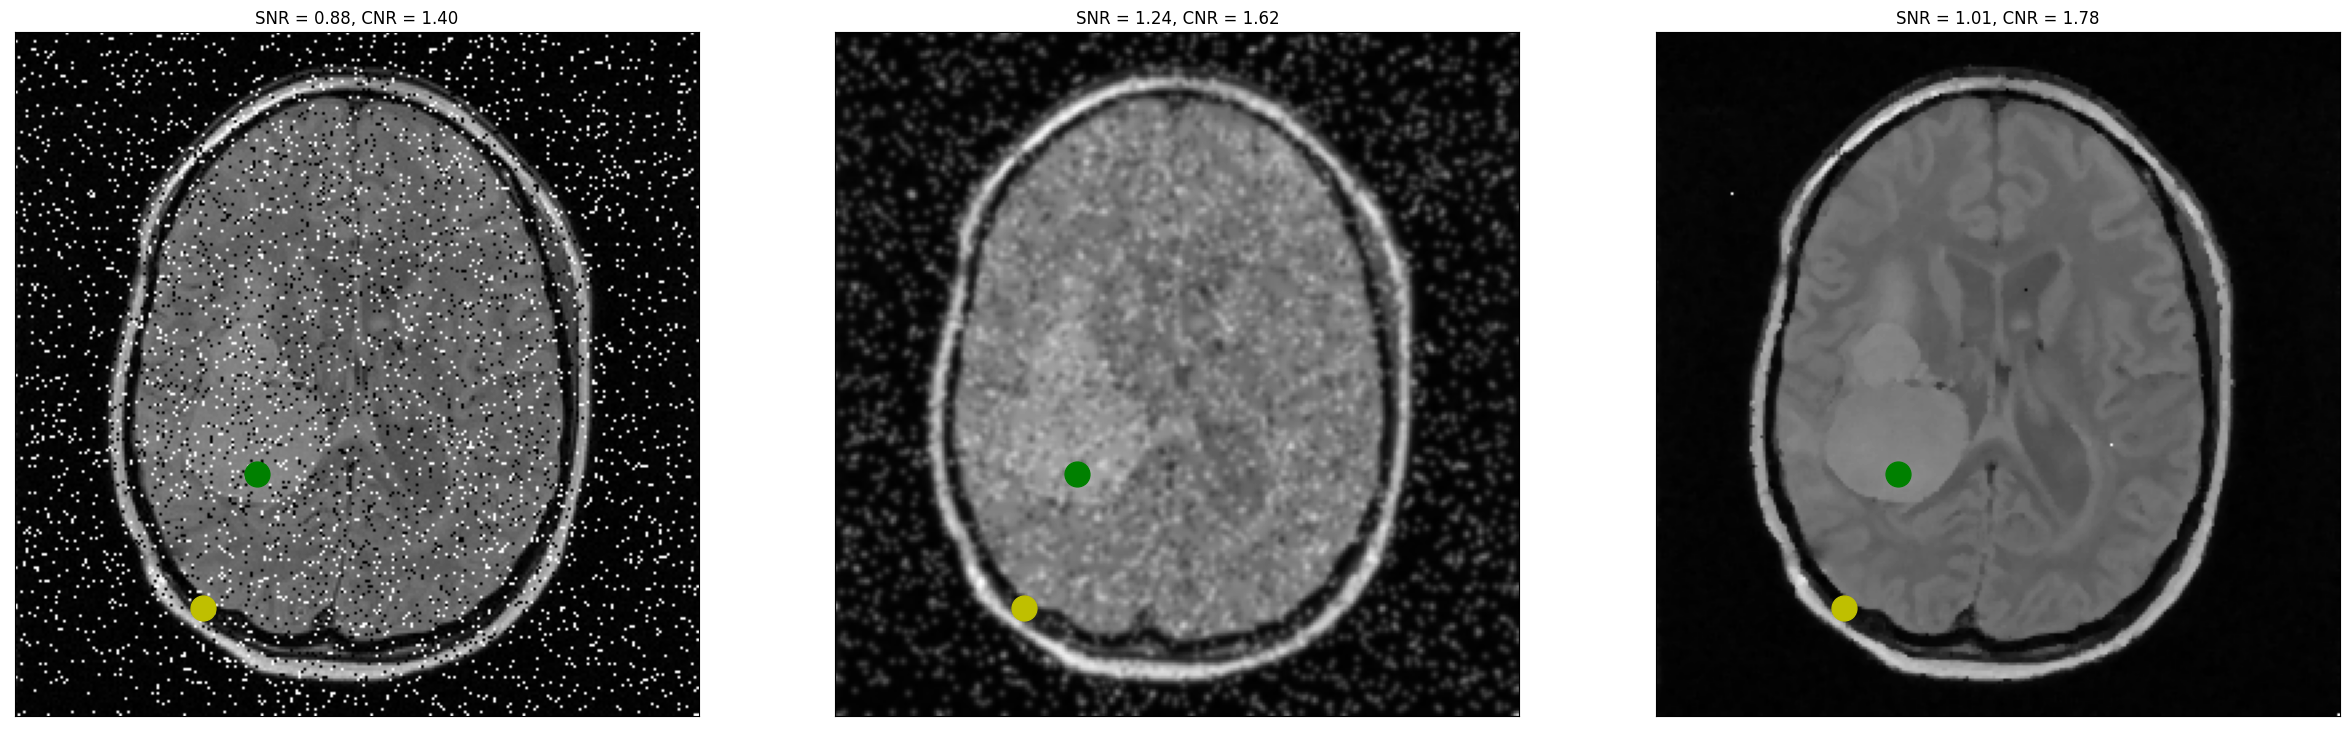

Gaussian Noise


/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_29392/863246641.py:34: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plot_image_with_point(ndimage.filters.gaussian_filter(gauss_noise, 1), brain_point, csf_point, False)
/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_29392/863246641.py:36: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  plot_image_with_point(ndimage.filters.median_filter(gauss_noise, 3), brain_point, csf_point, False)


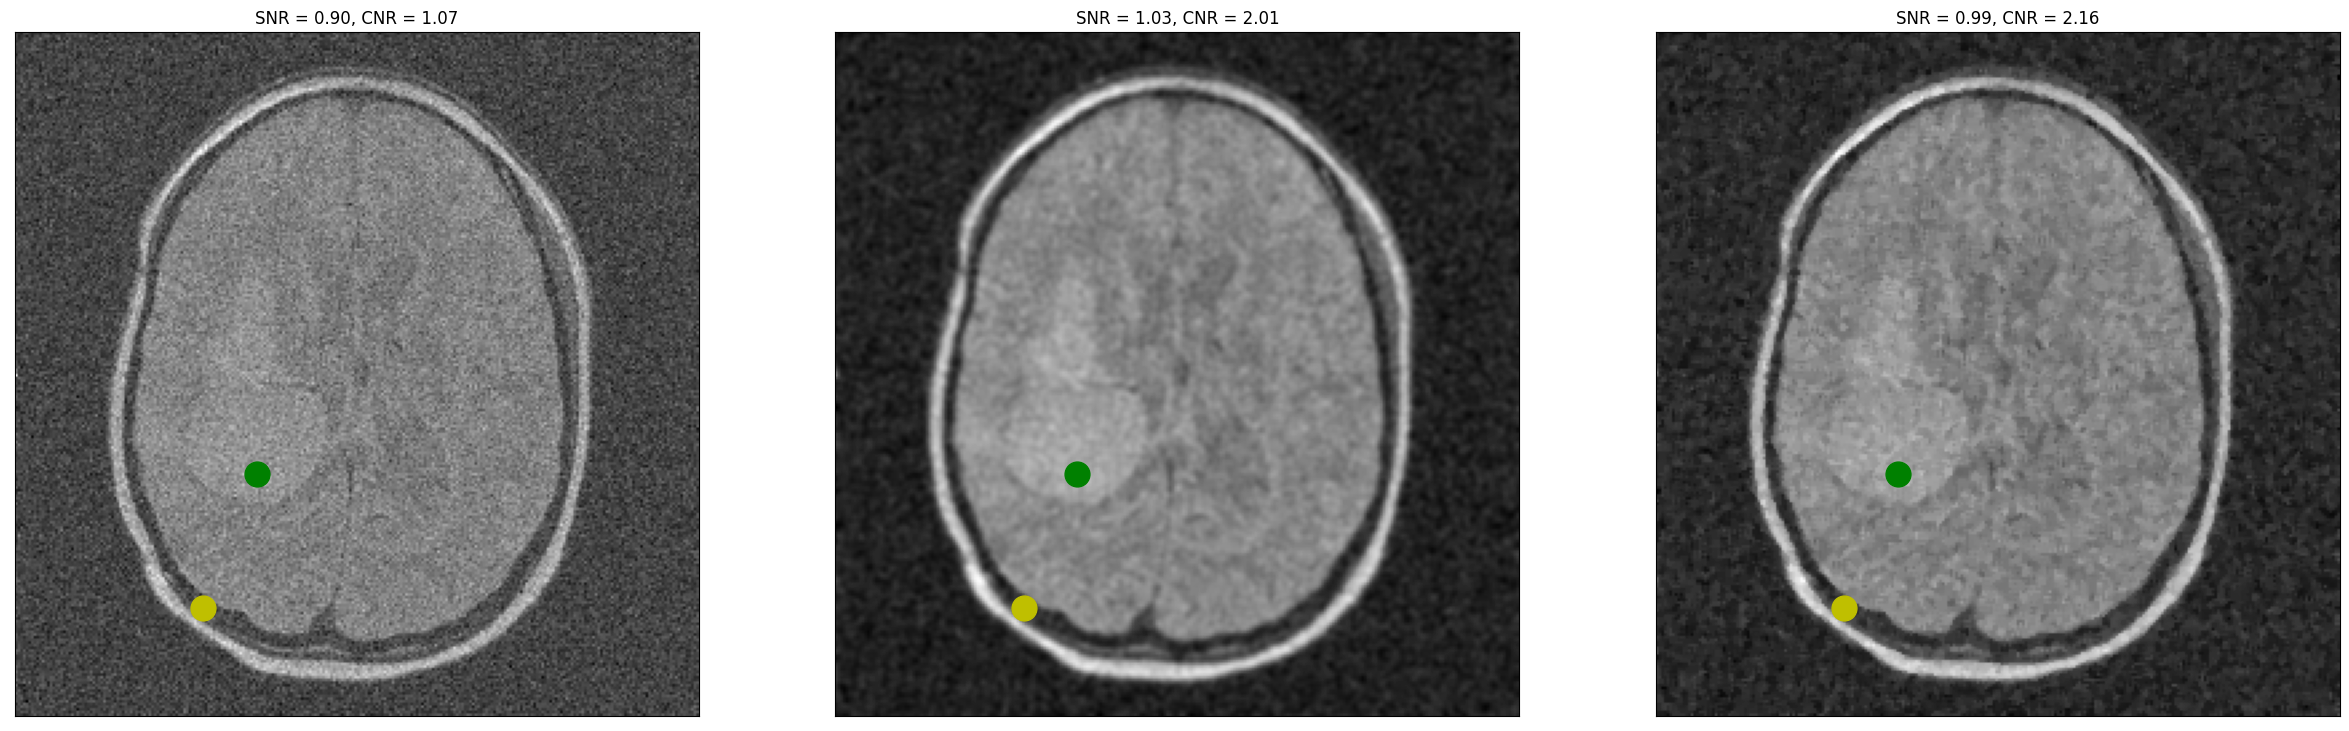

In [16]:
brain_point = (90, 165)
csf_point = (70, 215)

image = io.imread(os.path.join(data_directory, 'mri_pd.tif'))

gauss_noise = add_gaussian_noise(image, 0, 0.01)
med_noise = add_salt_and_pepper_noise(image, 0.1)

print('Image and noise')
plt.subplots(1, 3, figsize=(30, 10))
for i, this_image in enumerate([image, gauss_noise, med_noise]):
    plt.subplot(1, 3, i+1)
    plot_image_with_point(this_image, brain_point, csf_point, False)
plt.show()

print('Salt & Pepper Noise')
plt.subplots(1, 3, figsize=(30, 10))

plt.subplot(1, 3, 1)
plot_image_with_point(med_noise, brain_point, csf_point, False)
plt.subplot(1, 3, 2)
plot_image_with_point(ndimage.filters.gaussian_filter(med_noise, 1), brain_point, csf_point, False)
plt.subplot(1, 3, 3)
plot_image_with_point(ndimage.filters.median_filter(med_noise, 3), brain_point, csf_point, False)
plt.show()


print('Gaussian Noise')
plt.subplots(1, 3, figsize=(30, 10))

plt.subplot(1, 3, 1)
plot_image_with_point(gauss_noise, brain_point, csf_point, False)
plt.subplot(1, 3, 2)
plot_image_with_point(ndimage.filters.gaussian_filter(gauss_noise, 1), brain_point, csf_point, False)
plt.subplot(1, 3, 3)
plot_image_with_point(ndimage.filters.median_filter(gauss_noise, 3), brain_point, csf_point, False)
plt.show()

In [17]:
print('''Question 1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
TODO: Answer
''')
print('''Question 2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer
''')
print('''Question 3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer
''')
print('''Question 4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?
TODO: Answer
''')

Question 1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
TODO: Answer

Question 2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer

Question 3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer

Question 4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?
TODO: Answer



### Question 1

#### The Gaussian noise appears overall more blurry compared to the salt and pepper noise. On the Gaussian Noise images it is much more difficult to make out specific features and the image looks much more homogenous. Although the salt and pepper images have extreme dark and bright pixels that make the image appear distracting, it is easier to pick out features most of the time comapred to the Gaussian noise images.

### Question 2

#### The Gaussian Filtered salt and pepper noise images had better SNR values but worse CNR values compared to the median filtered Salt and Pepper images. From the perspective of a radiologist the median filters produced a much better qualitative image as the detail of the image was much more clear and could be interpreted more easily.

### Question 3

#### The Gaussian Filtered Gaussian Noise images had better SNR values and worse CNR values compared to the median filtered images. Moreover it could be said that qualitatively the Gaussian Filtered Gaussian Noise images produced a slightly better overall qualitative images with details being able to be picked out more easily on the whole, and with a less smooth and homogenous overall image.

### Question 4

#### No, the best qualitative results does not always agree with the best numerical result. There could be situations where the image exhibits a high degree of distortion, or was taken incorrectly in the target region. So therefore even though the image might present high numerical result values it could actually be of little qualitative use to the interpreter. It is wise to visualize images because human perception can identify issues with images that metrics cannot. Metrics can only tell part of the story, whereas when we visualize the images we can see the complete picture and understand everything we need about it.


### Conclusion
TODO: Write your conclusion here

## Overall this lab allowed us to explore various aspects of image processing ranging from loading images, to manipulating images, to analyzing filters. We began by learning how to load images and plot them, we then proceeding to implement window-level functions to understand how we can manipulate images to target specific regions of an image. We then explored the Gaussian function and how kernel and sigma sizes can affect images while weighing the implications of various differing sizes, and then concluded with exploring Signal, Noise and Contrast by analyzing SNR and CNR across differing filters and how they impacted the qualitiative image that can be interpreted by a radiologist.